<a href="https://colab.research.google.com/github/MDRobiulhassan/Machine-Learning-Predictions/blob/main/Earthquake_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/University/7th Semester/MLL/colab/Eartquakes-1990-2023.csv')

In [3]:
df.head()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB


In [5]:
df.shape

(3445751, 12)

In [6]:
df.isna().sum() / len(df)

,0
time,0.0
place,0.0
status,0.0
tsunami,0.0
significance,0.0
data_type,0.0
magnitudo,0.0
state,0.0
longitude,0.0
latitude,0.0


In [7]:
df.duplicated().sum()

np.int64(16869)

In [8]:
df = df.drop_duplicates().reset_index(drop=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,3428882.0,1.247118e+12,2.975887e+11,6.311534e+11,1.024409e+12,1.282329e+12,1.508620e+12,1.690629e+12
tsunami,3428882.0,4.424183e-04,2.102909e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
significance,3428882.0,7.400236e+01,1.016332e+02,0.000000e+00,1.300000e+01,3.300000e+01,8.100000e+01,2.910000e+03
magnitudo,3428882.0,1.773933e+00,1.291012e+00,-9.990000e+00,9.100000e-01,1.460000e+00,2.300000e+00,9.100000e+00
longitude,3428882.0,-1.012787e+02,7.698497e+01,-1.799997e+02,-1.464195e+02,-1.189527e+02,-1.159280e+02,1.800000e+02
latitude,3428882.0,3.746733e+01,2.040831e+01,-8.442200e+01,3.406400e+01,3.793420e+01,4.784117e+01,8.738600e+01
depth,3428882.0,2.285096e+01,5.484797e+01,-1.000000e+01,3.120000e+00,7.700000e+00,1.611100e+01,7.358000e+02


In [11]:
import pandas as pd

outlier_summary = []

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()

    if outlier_count > 0:
        outlier_summary.append({
            'feature': col,
            'Q1': Q1,
            'Q3': Q3,
            'lower_bound': lower,
            'upper_bound': upper,
            'outlier_count': outlier_count
        })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df


,feature,Q1,Q3,lower_bound,upper_bound,outlier_count
0,tsunami,0.0000,0.000000,0.00000,0.000000,1517
1,significance,13.0000,81.000000,-89.00000,183.000000,457227
2,magnitudo,0.9100,2.300000,-1.17500,4.385000,243466
3,longitude,-146.4195,-115.928000,-192.15675,-70.190750,501900
4,latitude,34.0640,47.841167,13.39825,68.506917,296909
5,depth,3.1200,16.111000,-16.36650,35.597500,490365


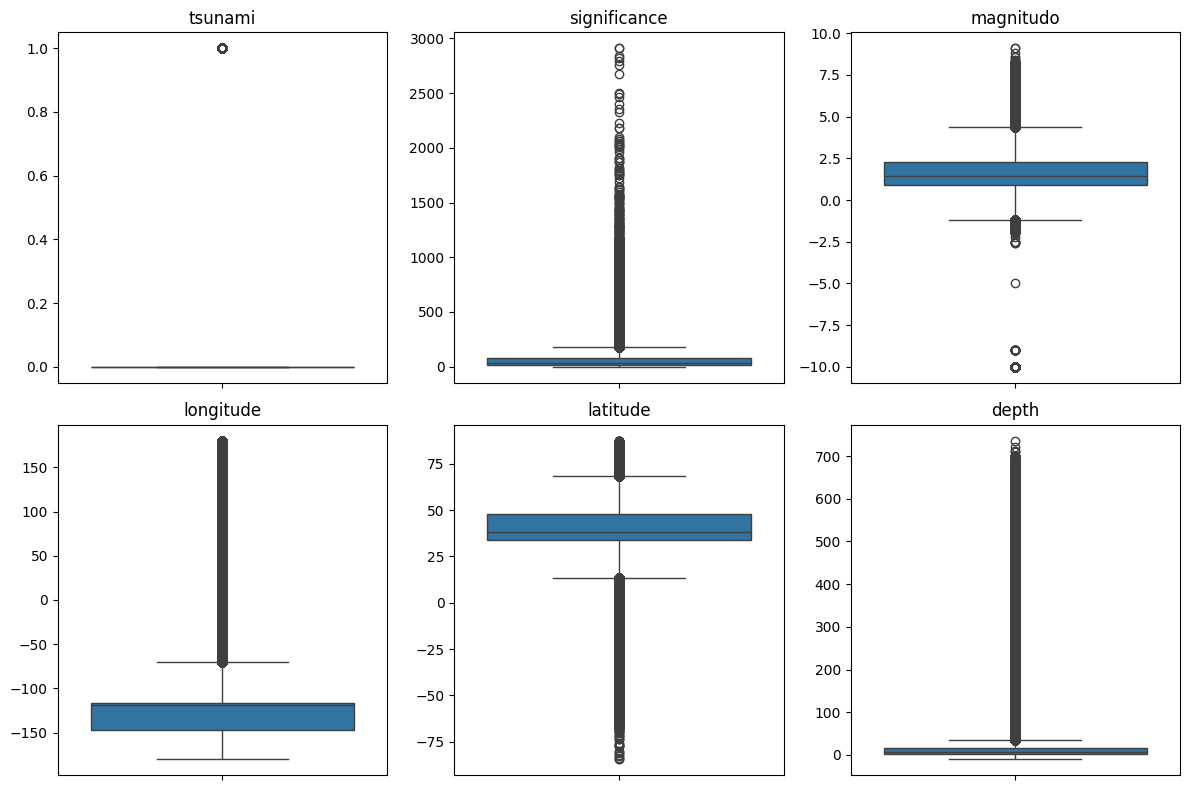

In [12]:
# Numeric columns to plot
numeric_features = ['tsunami', 'significance', 'magnitudo', 'longitude', 'latitude', 'depth']

rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('')

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [13]:
for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[feature] = df[feature].clip(lower, upper)

print("Outliers have been capped.")

Outliers have been capped.


In [14]:
capped_summary = []

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    capped_summary.append([feature, Q1, Q3, lower, upper, 0])

capped_df = pd.DataFrame(capped_summary, columns=['feature','Q1','Q3','lower_bound','upper_bound','outlier_count'])

capped_df

,feature,Q1,Q3,lower_bound,upper_bound,outlier_count
0,tsunami,0.0000,0.000000,0.00000,0.000000,0
1,significance,13.0000,81.000000,-89.00000,183.000000,0
2,magnitudo,0.9100,2.300000,-1.17500,4.385000,0
3,longitude,-146.4195,-115.928000,-192.15675,-70.190750,0
4,latitude,34.0640,47.841167,13.39825,68.506917,0
5,depth,3.1200,16.111000,-16.36650,35.597500,0


In [15]:
cols = ['significance', 'magnitudo', 'depth', 'longitude', 'latitude', 'tsunami']
df[cols].describe()

,significance,magnitudo,depth,longitude,latitude,tsunami
count,3.428882e+06,3.428882e+06,3.428882e+06,3.428882e+06,3.428882e+06,3428882.0
mean,5.772111e+01,1.748445e+00,1.218568e+01,-1.205937e+02,3.983165e+01,0.0
std,6.053158e+01,1.215767e+00,1.219173e+01,2.794186e+01,1.420589e+01,0.0
min,0.000000e+00,-1.175000e+00,-1.000000e+01,-1.799997e+02,1.339825e+01,0.0
25%,1.300000e+01,9.100000e-01,3.120000e+00,-1.464195e+02,3.406400e+01,0.0
50%,3.300000e+01,1.460000e+00,7.700000e+00,-1.189527e+02,3.793420e+01,0.0
75%,8.100000e+01,2.300000e+00,1.611100e+01,-1.159280e+02,4.784117e+01,0.0
max,1.830000e+02,4.385000e+00,3.559750e+01,-7.019075e+01,6.850692e+01,0.0


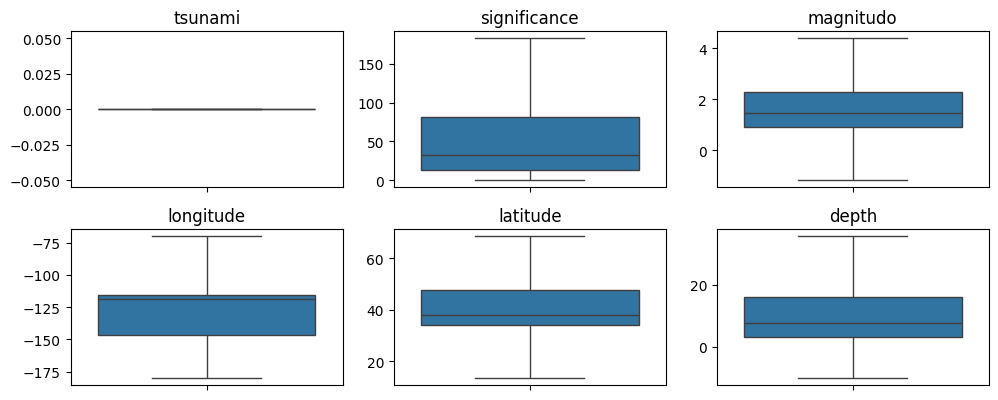

In [16]:
rows = 5
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [17]:
numeric_features = df.select_dtypes(include='number').columns

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # For features that can't be negative, set lower bound to 0
    if feature in ['magnitudo', 'depth', 'tsunami', 'significance']:
        lower = 0

    df[feature] = df[feature].clip(lower, upper)

print("Outliers capped with logical bounds.")


Outliers capped with logical bounds.


In [18]:
capped_summary = []

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    capped_summary.append([feature, Q1, Q3, lower, upper, 0])

capped_df = pd.DataFrame(capped_summary, columns=['feature','Q1','Q3','lower_bound','upper_bound','outlier_count'])

capped_df

,feature,Q1,Q3,lower_bound,upper_bound,outlier_count
0,time,1.024409e+12,1.508620e+12,2.980918e+11,2.234937e+12,0
1,tsunami,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
2,significance,1.300000e+01,8.100000e+01,-8.900000e+01,1.830000e+02,0
3,magnitudo,9.100000e-01,2.300000e+00,-1.175000e+00,4.385000e+00,0
4,longitude,-1.464195e+02,-1.159280e+02,-1.921567e+02,-7.019075e+01,0
5,latitude,3.406400e+01,4.784117e+01,1.339825e+01,6.850692e+01,0
6,depth,3.120000e+00,1.611100e+01,-1.636650e+01,3.559750e+01,0


In [19]:
cols = ['significance', 'magnitudo', 'depth', 'longitude', 'latitude', 'tsunami']
df[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
significance,3428882.0,57.721105,60.531583,0.00000,13.0000,33.000000,81.000000,183.000000
magnitudo,3428882.0,1.757334,1.200848,0.00000,0.9100,1.460000,2.300000,4.385000
depth,3428882.0,12.230378,12.144117,0.00000,3.1200,7.700000,16.111000,35.597500
longitude,3428882.0,-120.593720,27.941864,-179.99970,-146.4195,-118.952667,-115.928000,-70.190750
latitude,3428882.0,39.831654,14.205892,13.39825,34.0640,37.934200,47.841167,68.506917
tsunami,3428882.0,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000


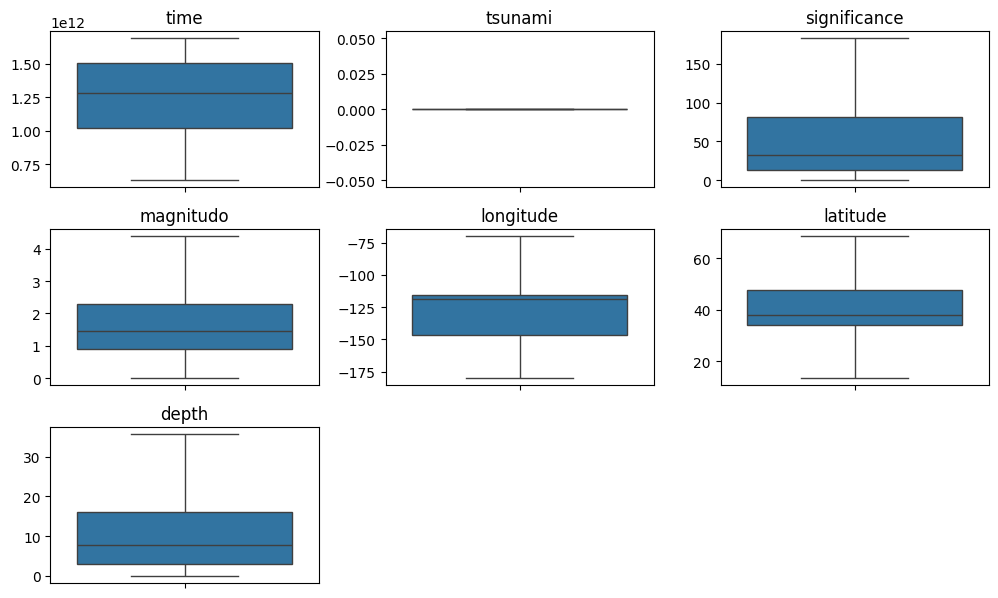

In [20]:
rows = 5
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [21]:
# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

# Add month and year columns for aggregation
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Optional: filter states with enough data
selected_states = df['state'].value_counts().head(10).index  # top 10 states by quake count
quake_df = df[df['state'].isin(selected_states)]


In [22]:
# Count of earthquakes per month per state
monthly_state_quakes = pd.pivot_table(
    quake_df,
    index='month',       # rows = month
    columns='state',     # columns = state
    values='time',       # just count occurrences
    aggfunc='count',
    fill_value=0
)
monthly_state_quakes


state,Alaska,California,Hawaii,Indonesia,Montana,Nevada,Puerto Rico,Utah,Washington,California
month,,,,,,,,,,
1,63291,71427,9682,5007,5763,14077,10061,4859,5400,37253
2,59906,63025,12732,4016,4048,11529,3750,5081,5645,35359
3,66948,69961,9736,3906,3548,11959,3559,5913,6325,40608
4,66525,65369,10203,4491,3975,21352,3229,4940,6514,41813
5,67476,69790,14587,3770,3787,22909,3341,4316,7409,42447
6,56143,66593,7751,3878,5288,12721,2417,4006,6559,41887
7,61413,80504,8527,3484,4928,14403,2907,4162,6906,39299
8,66911,73045,11806,3605,4777,13530,3034,4305,7383,48599
9,61714,75011,9831,3879,3950,13483,3174,4313,8244,43178


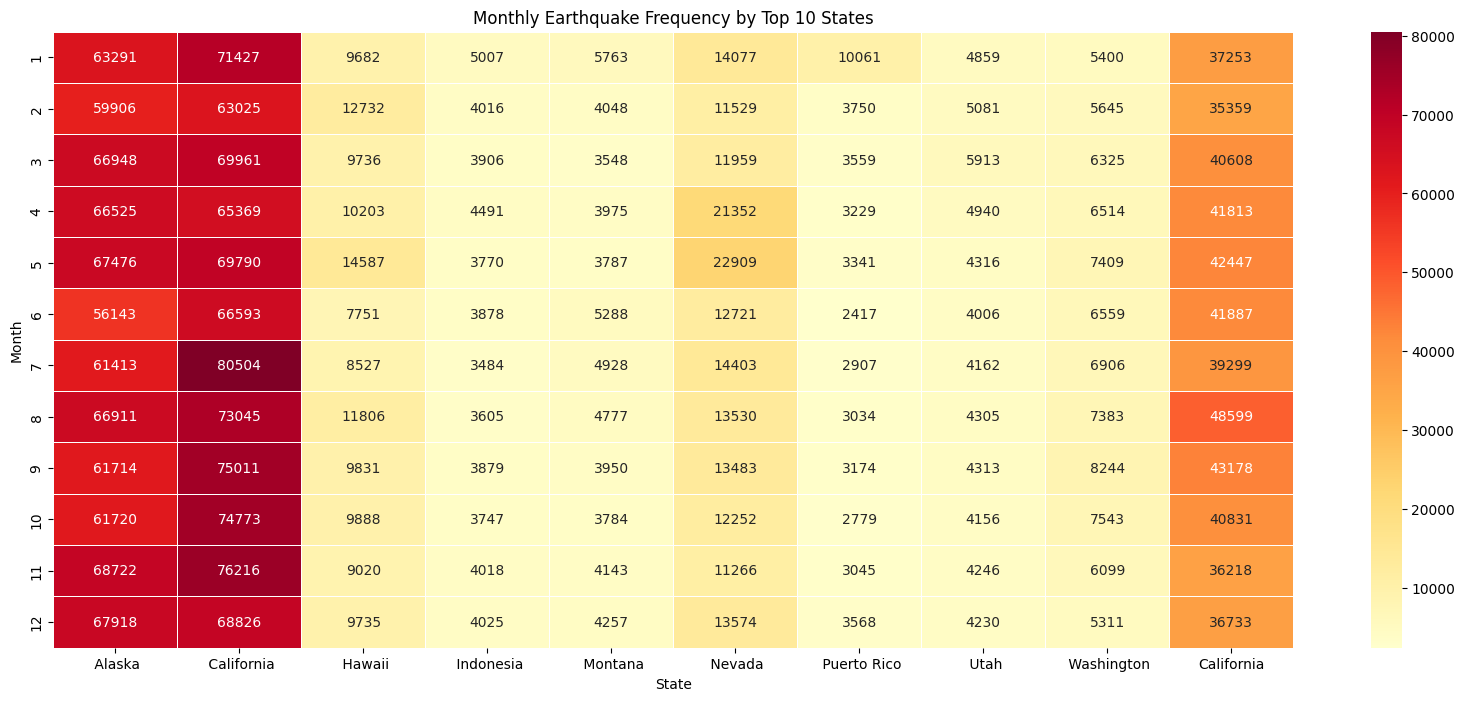

In [23]:
plt.figure(figsize=(20,8))
sns.heatmap(monthly_state_quakes, cmap='YlOrRd', linewidths=0.5, annot=True, fmt='d')
plt.title('Monthly Earthquake Frequency by Top 10 States')
plt.ylabel('Month')
plt.xlabel('State')
plt.show()


In [24]:
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler
from sklearn.neighbors import NearestNeighbors
import pandas as pd

In [25]:
 def get_knn(df, n, k, feature_names, metric='euclidean'):
    """
    Display k nearest neighbors for a given row n in df.
    """
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric, algorithm='brute')
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)

    df_res = pd.concat([
        df.iloc[nbrs_indices[0]],
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
    ], axis=1)

    return df_res

In [26]:
feature_names = ['magnitudo', 'depth', 'longitude', 'latitude', 'significance', 'tsunami']

In [27]:
# Euclidean distance
unscaled_knn_euclidean = get_knn(df, 1, 10, feature_names, metric='euclidean')
unscaled_knn_euclidean

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date,month,year,distance
1,6.311535e+11,"14 km S of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00,1.0,1990.0,0.000000
2136411,1.402227e+12,"12 km S of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.43,Hawaii,-155.221833,19.334500,6.604,2014-06-08 11:26:05.250000+00:00,6.0,2014.0,NaN
55174,6.646010e+11,"15 km S of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.43,Hawaii,-155.216333,19.300500,6.608,1991-01-23 03:23:52.750000+00:00,1.0,1991.0,NaN
1268555,1.147281e+12,"14 km SSE of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.41,Hawaii,-155.190333,19.322333,6.557,2006-05-10 17:02:20.530000+00:00,5.0,2006.0,NaN
56942,6.658881e+11,"14 km SSE of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.43,Hawaii,-155.187500,19.324167,6.559,1991-02-07 00:55:20.940000+00:00,2.0,1991.0,NaN
1201645,1.125118e+12,"11 km S of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.43,Hawaii,-155.212167,19.337000,6.538,2005-08-27 04:38:37.650000+00:00,8.0,2005.0,NaN
1257803,1.144203e+12,"15 km S of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.43,Hawaii,-155.251333,19.307167,6.620,2006-04-05 02:12:06.350000+00:00,4.0,2006.0,NaN
2633006,1.523836e+12,"12 km SSE of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.41,Hawaii,-155.194000,19.333833,6.650,2018-04-15 23:45:02.860000+00:00,4.0,2018.0,NaN
2195803,1.415520e+12,"14 km SSE of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.43,Hawaii,-155.182333,19.325667,6.518,2014-11-09 07:59:51.480000+00:00,11.0,2014.0,NaN
115634,7.021955e+11,"14 km SSE of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.42,Hawaii,-155.205333,19.319167,6.663,1992-04-02 06:17:54.030000+00:00,4.0,1992.0,NaN


In [28]:
# Manhattan distance
unscaled_knn_manhattan = get_knn(df, 1, 10, feature_names, metric='manhattan')
unscaled_knn_manhattan

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date,month,year,distance
1,6.311535e+11,"14 km S of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00,1.0,1990.0,0.000000
1268555,1.147281e+12,"14 km SSE of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.41,Hawaii,-155.190333,19.322333,6.557,2006-05-10 17:02:20.530000+00:00,5.0,2006.0,NaN
55174,6.646010e+11,"15 km S of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.43,Hawaii,-155.216333,19.300500,6.608,1991-01-23 03:23:52.750000+00:00,1.0,1991.0,NaN
2136411,1.402227e+12,"12 km S of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.43,Hawaii,-155.221833,19.334500,6.604,2014-06-08 11:26:05.250000+00:00,6.0,2014.0,NaN
56942,6.658881e+11,"14 km SSE of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.43,Hawaii,-155.187500,19.324167,6.559,1991-02-07 00:55:20.940000+00:00,2.0,1991.0,NaN
1201645,1.125118e+12,"11 km S of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.43,Hawaii,-155.212167,19.337000,6.538,2005-08-27 04:38:37.650000+00:00,8.0,2005.0,NaN
115634,7.021955e+11,"14 km SSE of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.42,Hawaii,-155.205333,19.319167,6.663,1992-04-02 06:17:54.030000+00:00,4.0,1992.0,NaN
2633006,1.523836e+12,"12 km SSE of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.41,Hawaii,-155.194000,19.333833,6.650,2018-04-15 23:45:02.860000+00:00,4.0,2018.0,NaN
1085548,1.092631e+12,"16 km S of Fern Forest, Hawaii",reviewed,0.0,31.0,earthquake,1.41,Hawaii,-155.127167,19.315000,6.598,2004-08-16 04:30:25.940000+00:00,8.0,2004.0,NaN
1257803,1.144203e+12,"15 km S of Volcano, Hawaii",reviewed,0.0,31.0,earthquake,1.43,Hawaii,-155.251333,19.307167,6.620,2006-04-05 02:12:06.350000+00:00,4.0,2006.0,NaN


In [29]:
scaler_mas = MaxAbsScaler()
df_scaled = df.copy()
df_scaled[feature_names] = scaler_mas.fit_transform(df[feature_names])

In [30]:
# Euclidean distance
scaled_knn_euclidean = get_knn(df_scaled, 1, 10, feature_names, metric='euclidean')
scaled_knn_euclidean

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date,month,year,distance
1,6.311535e+11,"14 km S of Volcano, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.862292,0.281981,0.184985,1990-01-01 00:24:51.210000+00:00,1.0,1990.0,0.000000
1085548,1.092631e+12,"16 km S of Fern Forest, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.861819,0.281942,0.185350,2004-08-16 04:30:25.940000+00:00,8.0,2004.0,NaN
405999,8.210067e+11,"14 km SSE of Fern Forest, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.861644,0.282366,0.185153,1996-01-07 09:25:42.700000+00:00,1.0,1996.0,NaN
1268555,1.147281e+12,"14 km SSE of Volcano, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.862170,0.282049,0.184198,2006-05-10 17:02:20.530000+00:00,5.0,2006.0,NaN
439651,8.372234e+11,"9 km SW of Volcano, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.862791,0.282954,0.185378,1996-07-13 02:03:41.890000+00:00,7.0,1996.0,NaN
1075234,1.089388e+12,"15 km S of Fern Forest, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.861766,0.282130,0.183946,2004-07-09 15:49:30.770000+00:00,7.0,2004.0,NaN
795228,9.968404e+11,"19 km N of P?hala, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.863763,0.282813,0.185715,2001-08-03 12:06:09.350000+00:00,8.0,2001.0,NaN
2633006,1.523836e+12,"12 km SSE of Volcano, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.862190,0.282217,0.186811,2018-04-15 23:45:02.860000+00:00,4.0,2018.0,NaN
1491653,1.211873e+12,"20 km N of P?hala, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.863901,0.282984,0.184648,2008-05-27 07:20:00.430000+00:00,5.0,2008.0,NaN
789603,9.953932e+11,"13 km SSE of Volcano, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.862105,0.282239,0.186951,2001-07-17 18:07:01.710000+00:00,7.0,2001.0,NaN


In [31]:
# Manhattan distance
scaled_knn_manhattan = get_knn(df_scaled, 1, 10, feature_names, metric='manhattan')
scaled_knn_manhattan

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date,month,year,distance
1,6.311535e+11,"14 km S of Volcano, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.862292,0.281981,0.184985,1990-01-01 00:24:51.210000+00:00,1.0,1990.0,0.000000
1085548,1.092631e+12,"16 km S of Fern Forest, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.861819,0.281942,0.185350,2004-08-16 04:30:25.940000+00:00,8.0,2004.0,NaN
1268555,1.147281e+12,"14 km SSE of Volcano, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.862170,0.282049,0.184198,2006-05-10 17:02:20.530000+00:00,5.0,2006.0,NaN
405999,8.210067e+11,"14 km SSE of Fern Forest, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.861644,0.282366,0.185153,1996-01-07 09:25:42.700000+00:00,1.0,1996.0,NaN
1075234,1.089388e+12,"15 km S of Fern Forest, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.861766,0.282130,0.183946,2004-07-09 15:49:30.770000+00:00,7.0,2004.0,NaN
439651,8.372234e+11,"9 km SW of Volcano, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.862791,0.282954,0.185378,1996-07-13 02:03:41.890000+00:00,7.0,1996.0,NaN
2633006,1.523836e+12,"12 km SSE of Volcano, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.862190,0.282217,0.186811,2018-04-15 23:45:02.860000+00:00,4.0,2018.0,NaN
789603,9.953932e+11,"13 km SSE of Volcano, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.862105,0.282239,0.186951,2001-07-17 18:07:01.710000+00:00,7.0,2001.0,NaN
1491653,1.211873e+12,"20 km N of P?hala, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.863901,0.282984,0.184648,2008-05-27 07:20:00.430000+00:00,5.0,2008.0,NaN
795228,9.968404e+11,"19 km N of P?hala, Hawaii",reviewed,0.0,0.169399,earthquake,0.321551,Hawaii,-0.863763,0.282813,0.185715,2001-08-03 12:06:09.350000+00:00,8.0,2001.0,NaN


In [32]:
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[feature_names] = scaler_minmax.fit_transform(df[feature_names])

In [33]:
scaler_std = StandardScaler()
df_std = df.copy()
df_std[feature_names] = scaler_std.fit_transform(df[feature_names])

In [34]:
df_fs = df[numeric_features].copy()

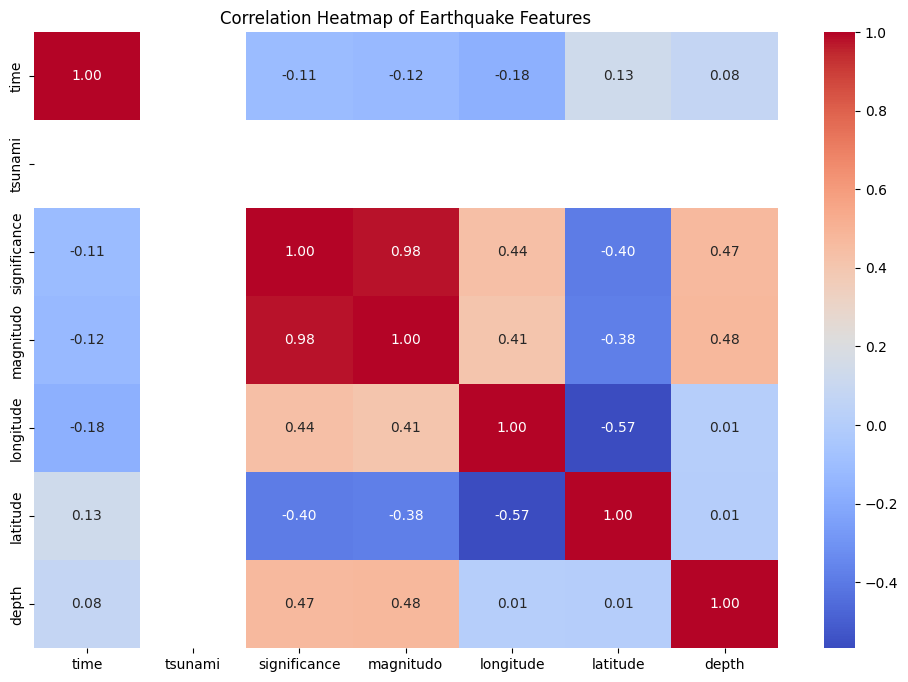

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    df_fs.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
heatmap.set_title('Correlation Heatmap of Earthquake Features')
plt.show()

In [36]:
df = df.drop(columns=['tsunami'])
df = df.drop(columns=['significance'])

In [37]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 kB 14.8 MB/s eta 0:00:00


In [38]:
from pyod.models.knn import KNN

In [39]:
outlier_features = [
    'magnitudo',
    'depth',
    'longitude',
    'latitude'
]

outlier_df = df[outlier_features].copy()

model = KNN()
model.fit(outlier_df)

outlier_df['is_outlier'] = model.predict(outlier_df) == 1

In [40]:
num_anomalies = outlier_df['is_outlier'].sum()
print("Number of Anomalous Earthquake Records:", num_anomalies)

Number of Anomalous Earthquake Records: 296487


In [41]:
outlier_indices = outlier_df[outlier_df['is_outlier']].index
df_final = df.drop(index=outlier_indices)

df_final.shape

(3085652, 12)